In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [3]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

Q1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test
sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network
that you train from scratch. What performance did you achieve?



Retriving images to training, validation, and test directories

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

tra = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
valid = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
tes= image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


preprocessing dataset

In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [11]:
for data_batch, labels_batch in tra:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Identifying a small convolution for dogs vs. cats categories .

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

input1000 = keras.Input(shape=(180, 180, 3))
din = layers.Rescaling(1./255)(input1000)
din = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(din)
din = layers.MaxPooling2D(pool_size=2)(din)
din = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(din)
din = layers.MaxPooling2D(pool_size=2)(din)
din = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(din)
din = layers.MaxPooling2D(pool_size=2)(din)
din = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(din)
din = layers.MaxPooling2D(pool_size=2)(din)
din = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(din)
din = layers.Flatten()(din)
din = layers.Dropout(0.5)(din)
output1000 = layers.Dense(1, activation="sigmoid")(din)
model10 = keras.Model(inputs=input1000, outputs=output1000)

Model training

In [13]:
model10.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

I have used GPU for faster execution of code

In [14]:
model10.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

Model fitting

In [15]:
call1000 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
his1000 = model10.fit(
    tra,
    epochs=100,
    validation_data=valid,
    callbacks=call1000)

Epoch 1/100
63/63 [==============================] - 9s 31ms/step - loss: 0.6968 - accuracy: 0.4930 - val_loss: 0.6896 - val_accuracy: 0.5820
Epoch 2/100
63/63 [==============================] - 1s 17ms/step - loss: 0.6917 - accuracy: 0.5305 - val_loss: 0.6837 - val_accuracy: 0.5730
Epoch 3/100
63/63 [==============================] - 1s 17ms/step - loss: 0.6758 - accuracy: 0.5690 - val_loss: 0.6769 - val_accuracy: 0.5740
Epoch 4/100
63/63 [==============================] - 1s 17ms/step - loss: 0.6557 - accuracy: 0.6100 - val_loss: 0.6478 - val_accuracy: 0.6470
Epoch 5/100
63/63 [==============================] - 1s 17ms/step - loss: 0.6466 - accuracy: 0.6090 - val_loss: 0.6469 - val_accuracy: 0.6320
Epoch 6/100
63/63 [==============================] - 1s 16ms/step - loss: 0.6050 - accuracy: 0.6730 - val_loss: 0.6456 - val_accuracy: 0.6430
Epoch 7/100
63/63 [==============================] - 1s 16ms/step - loss: 0.5945 - accuracy: 0.6830 - val_loss: 0.6248 - val_accuracy: 0.6760
Epoch 

curves of loss and accuracy during training were constructed

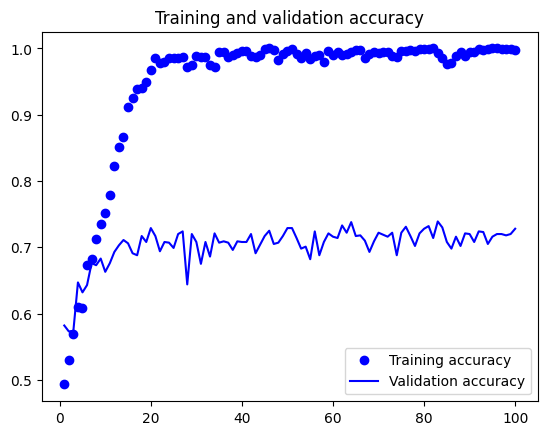

<Figure size 640x480 with 0 Axes>

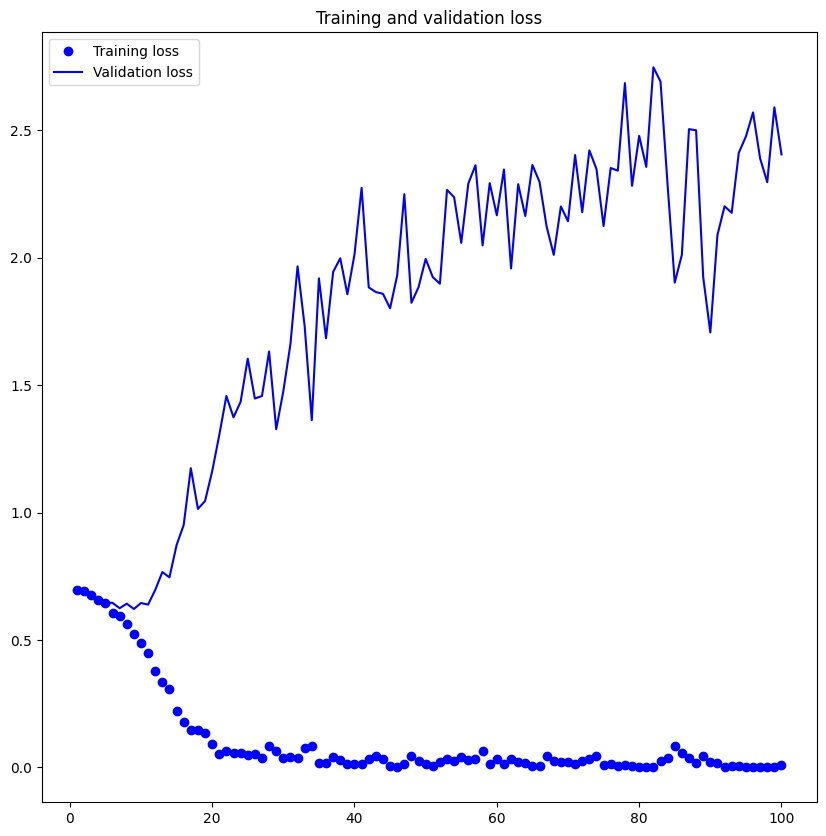

In [16]:
import matplotlib.pyplot as plt
accuracy = his1000.history["accuracy"]
val_accuracy = his1000.history["val_accuracy"]
loss = his1000.history["loss"]
val_loss = his1000.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
test1000 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test1000.evaluate(tes)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.5956 - accuracy: 0.7030
Test accuracy: 0.703


Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

Using data augmentation



In [18]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [19]:
augmentation_info = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

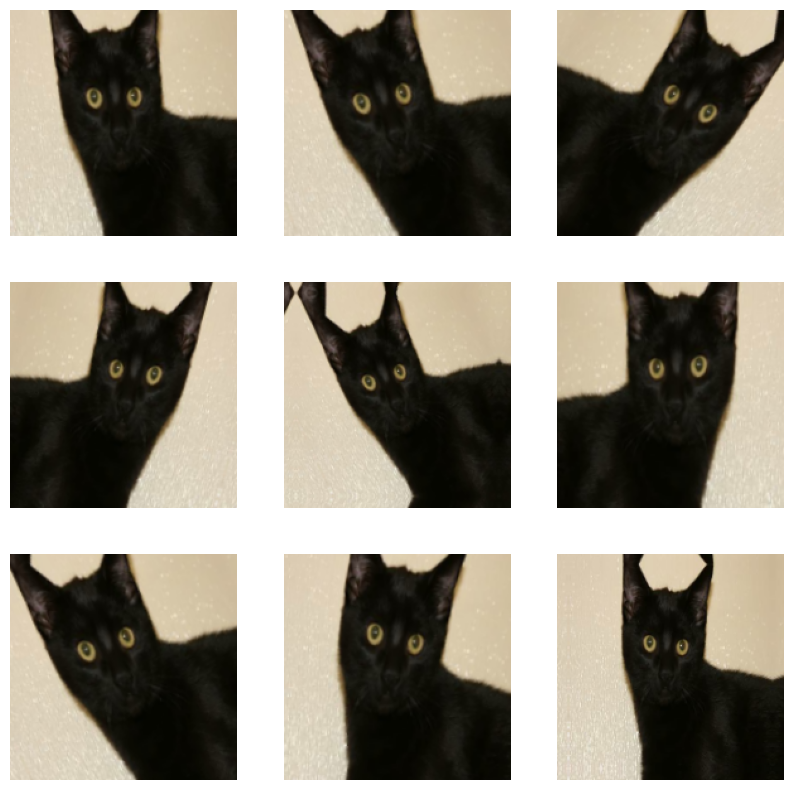

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in tra.take(1):
    for i in range(9):
        augmented_images = augmentation_info(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

convolutional neural network with dropout and picture augmentation

In [21]:
input15 = keras.Input(shape=(180, 180, 3))
din2 = augmentation_info(input15)
din2 = layers.Rescaling(1./255)(din2)
din2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(din2)
din2 = layers.MaxPooling2D(pool_size=2)(din2)
din2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(din2)
din2 = layers.MaxPooling2D(pool_size=2)(din2)
din2 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(din2)
din2 = layers.MaxPooling2D(pool_size=2)(din2)
din2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(din2)
din2 = layers.MaxPooling2D(pool_size=2)(din2)
din2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(din2)
din2 = layers.Flatten()(din2)
din2 = layers.Dropout(0.5)(din2)
output15 = layers.Dense(1, activation="sigmoid")(din2)
model15 = keras.Model(inputs=input15, outputs=output15)

model15.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
callback15 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_info.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist15 = model15.fit(
    tra,
    epochs=200,
    validation_data=valid,
    callbacks=callback15)

Epoch 1/200
63/63 [==============================] - 3s 20ms/step - loss: 0.6970 - accuracy: 0.5050 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/200
63/63 [==============================] - 1s 18ms/step - loss: 0.6909 - accuracy: 0.5130 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 3/200
63/63 [==============================] - 1s 18ms/step - loss: 0.6880 - accuracy: 0.5090 - val_loss: 0.6876 - val_accuracy: 0.5260
Epoch 4/200
63/63 [==============================] - 1s 18ms/step - loss: 0.6858 - accuracy: 0.5320 - val_loss: 0.6705 - val_accuracy: 0.5530
Epoch 5/200
63/63 [==============================] - 1s 17ms/step - loss: 0.6859 - accuracy: 0.5400 - val_loss: 0.6757 - val_accuracy: 0.5560
Epoch 6/200
63/63 [==============================] - 1s 17ms/step - loss: 0.6736 - accuracy: 0.5745 - val_loss: 0.7148 - val_accuracy: 0.5590
Epoch 7/200
63/63 [==============================] - 1s 17ms/step - loss: 0.6823 - accuracy: 0.5435 - val_loss: 0.6768 - val_accuracy: 0.5780
Epoch 

Test Accuracy of model

In [23]:
test15ac = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_info.keras")
test_loss, test_acc = test15ac.evaluate(tes)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.4779 - accuracy: 0.8220
Test accuracy: 0.822


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Increasing the training sample to 2000, keeping the Validation and test sets the same as before(500 samples)

In [24]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

In [25]:
input20 = keras.Input(shape=(180, 180, 3))
din3 = augmentation_info(input20)
din3 = layers.Rescaling(1./255)(din3)
din3 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(din3)
din3 = layers.MaxPooling2D(pool_size=2)(din3)
din3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(din3)
din3 = layers.MaxPooling2D(pool_size=2)(din3)
din3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(din3)
din3 = layers.MaxPooling2D(pool_size=2)(din3)
din3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(din3)
din3 = layers.MaxPooling2D(pool_size=2)(din3)
din3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(din3)
din3 = layers.Flatten()(din3)
din3 = layers.Dropout(0.5)(din3)
output20 = layers.Dense(1, activation="sigmoid")(din3)
mode20 = keras.Model(inputs=input20, outputs=output20)

mode20.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [26]:
callback20 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_info.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist20 = mode20.fit(
    tra,
    epochs=300,
    validation_data=valid,
    callbacks=callback20)

Epoch 1/300
63/63 [==============================] - 3s 20ms/step - loss: 0.6936 - accuracy: 0.4880 - val_loss: 0.6926 - val_accuracy: 0.6020
Epoch 2/300
63/63 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5170 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/300
63/63 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6877 - val_accuracy: 0.5550
Epoch 4/300
63/63 [==============================] - 1s 18ms/step - loss: 0.6929 - accuracy: 0.5085 - val_loss: 0.6876 - val_accuracy: 0.5010
Epoch 5/300
63/63 [==============================] - 1s 16ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6925 - val_accuracy: 0.5610
Epoch 6/300
63/63 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/300
63/63 [==============================] - 1s 16ms/step - loss: 0.6938 - accuracy: 0.4980 - val_loss: 0.6917 - val_accuracy: 0.5540
Epoch 

In [27]:
tesacc20 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_info.keras")
test_loss, test_acc = tesacc20.evaluate(tes)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.4901 - accuracy: 0.8040
Test accuracy: 0.804


Instantiating the VGG16 convolutional base

In [28]:
convoluted_b = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [29]:
convoluted_b.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

pretrained model for feature extraction without data augmentation

In [30]:
import numpy as np

def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convoluted_b.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels =  get_features_and_labels(tra)
val_features, val_labels =  get_features_and_labels(valid)
test_features, test_labels =  get_features_and_labels(tes)

1/1 [==============================] - 0s 21ms/step


In [31]:
train_features.shape

(2000, 5, 5, 512)

In [32]:
inp6 = keras.Input(shape=(5, 5, 512))
din4 = layers.Flatten()(inp6)
din4 = layers.Dense(256)(din4)
din4 = layers.Dropout(0.5)(din4)
out4 = layers.Dense(1, activation="sigmoid")(din4)
model4 = keras.Model(inp6, out4)
model4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbac4 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history466 = model4.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbac4)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 17.5665 - accuracy: 0.9265 - val_loss: 4.4696 - val_accuracy: 0.9630
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 2.7860 - accuracy: 0.9775 - val_loss: 8.8357 - val_accuracy: 0.9500
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8621 - accuracy: 0.9855 - val_loss: 3.8460 - val_accuracy: 0.9770
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3121 - accuracy: 0.9900 - val_loss: 3.8523 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6007 - accuracy: 0.9960 - val_loss: 4.6217 - val_accuracy: 0.9710
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1346 - accuracy: 0.9935 - val_loss: 5.8753 - val_accuracy: 0.9680
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.9980 - val_loss: 7.2924 - val_accuracy: 0.9620
Epoch 8/20
63/63 [=

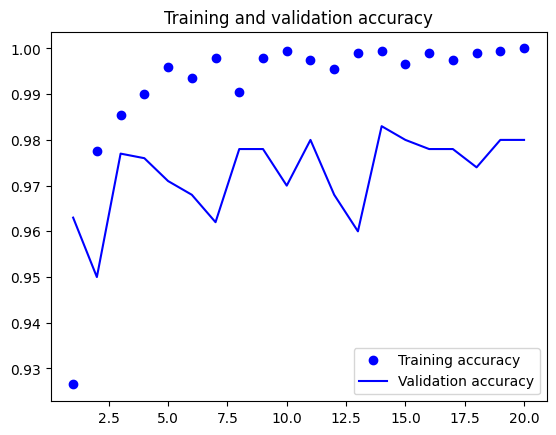

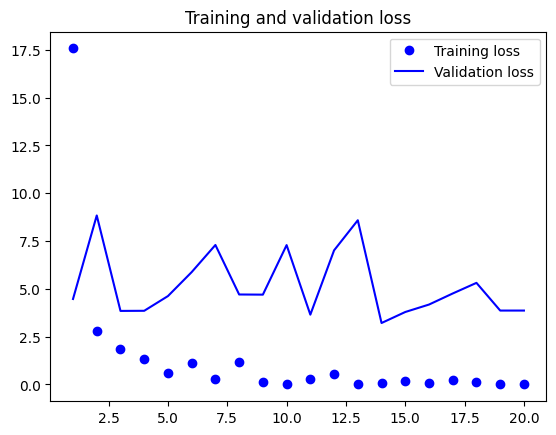

In [33]:
import matplotlib.pyplot as plt
accur4 = history466.history["accuracy"]
valac4 = history466.history["val_accuracy"]
loss4 = history466.history["loss"]
valloss4 = history466.history["val_loss"]
epochs = range(1, len(accur4) + 1)
plt.plot(epochs, accur4, "bo", label="Training accuracy")
plt.plot(epochs, valac4, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss4, "bo", label="Training loss")
plt.plot(epochs, valloss4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [34]:
convoluted_b  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convoluted_b.trainable = False

convoluted_b.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convoluted_b.trainable_weights))

convoluted_b.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convoluted_b.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Model is now performing with a classifier and agumentation to convulation base

In [35]:
augmented2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

input22 = keras.Input(shape=(180, 180, 3))
dinx = augmented2(input22)
dinx =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(dinx)
dinx = convoluted_b(dinx)
dinx = layers.Flatten()(dinx)
dinx = layers.Dense(256)(dinx)
dinx = layers.Dropout(0.5)(dinx)
outputs = layers.Dense(1, activation="sigmoid")(dinx)
modelx = keras.Model(input22, outputs)
modelx.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [36]:
callbafi = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

historyfi = modelx.fit(
    tra,
    epochs=10,
    validation_data=valid,
    callbacks=callbafi
)

Epoch 1/10
63/63 [==============================] - 4s 37ms/step - loss: 18.1709 - accuracy: 0.8985 - val_loss: 3.6626 - val_accuracy: 0.9720
Epoch 2/10
63/63 [==============================] - 2s 33ms/step - loss: 7.1967 - accuracy: 0.9490 - val_loss: 1.5404 - val_accuracy: 0.9810
Epoch 3/10
63/63 [==============================] - 2s 28ms/step - loss: 6.3302 - accuracy: 0.9515 - val_loss: 7.0458 - val_accuracy: 0.9630
Epoch 4/10
63/63 [==============================] - 2s 27ms/step - loss: 5.5661 - accuracy: 0.9580 - val_loss: 6.5527 - val_accuracy: 0.9660
Epoch 5/10
63/63 [==============================] - 2s 27ms/step - loss: 3.8799 - accuracy: 0.9645 - val_loss: 5.7896 - val_accuracy: 0.9690
Epoch 6/10
63/63 [==============================] - 2s 27ms/step - loss: 3.1075 - accuracy: 0.9695 - val_loss: 3.6678 - val_accuracy: 0.9700
Epoch 7/10
63/63 [==============================] - 2s 27ms/step - loss: 3.1434 - accuracy: 0.9695 - val_loss: 4.6109 - val_accuracy: 0.9730
Epoch 8/10
6

In [37]:
tesaccfi = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = tesaccfi.evaluate(tes)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 16ms/step - loss: 5.8296 - accuracy: 0.9670
Test accuracy: 0.967


Fine-tuning a pretrained model

In [38]:
convoluted_b.trainable = True
for layer in convoluted_b.layers[:-4]:
    layer.trainable = False

In [39]:
modelx.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacktuning = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
historytuning = modelx.fit(
    tra,
    epochs=30,
    validation_data=valid,
    callbacks=callbacktuning)

Epoch 1/30
63/63 [==============================] - 5s 39ms/step - loss: 1.8006 - accuracy: 0.9835 - val_loss: 2.6629 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 2s 34ms/step - loss: 1.0991 - accuracy: 0.9850 - val_loss: 2.4037 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 2s 34ms/step - loss: 0.9929 - accuracy: 0.9860 - val_loss: 2.2963 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 2s 26ms/step - loss: 1.0497 - accuracy: 0.9805 - val_loss: 2.4143 - val_accuracy: 0.9840
Epoch 5/30
63/63 [==============================] - 2s 34ms/step - loss: 0.6693 - accuracy: 0.9895 - val_loss: 2.1237 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 2s 34ms/step - loss: 0.5143 - accuracy: 0.9875 - val_loss: 1.9112 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 2s 26ms/step - loss: 1.0529 - accuracy: 0.9805 - val_loss: 2.3851 - val_accuracy: 0.9830
Epoch 8/30
63

In [40]:
tuning = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = modelx.evaluate(tes)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 16ms/step - loss: 3.2184 - accuracy: 0.9650
Test accuracy: 0.965
